In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd '/gdrive/MyDrive/Bank_app/'

/gdrive/MyDrive/Bank_app


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data
data = pd.read_csv('bank_app_08072022.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18205 entries, 0 to 18204
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bank          18205 non-null  object
 1   review_text   18157 non-null  object
 2   review_score  18205 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 426.8+ KB


In [ ]:
data = data.drop_duplicates()
data.shape

(17579, 3)

In [ ]:
data.isnull().T.any().sum()

46

Xóa dữ liệu trùng/NaN/null

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(17533, 3)

In [ ]:
len(data.Bank.unique())

29

## Dữ liệu gồm 17533 records (reviews) cho 29 bank apps.

In [ ]:
data.head()

,Bank,review_text,review_score
2,HDBank,Stupid bank app without help on how to generat...,1
3,HDBank,High fees. And money sometimes just disappear ...,1
4,HDBank,Unable to login by password and unable to logi...,4
5,HDBank,"Whenever I choose transfer money option, the a...",3
6,HDBank,I can not run this app recently. It crashes al...,3


In [ ]:
data.tail()

,Bank,review_text,review_score
18199,TPBank Mobile,"App rất tốt, cảm ơn TPBank",5
18200,TPBank Mobile,Mình rất thích dùng app tpbank tiện lợi mà chu...,5
18202,TPBank Mobile,"Giao diện đẹp, giao dịch nhanh , dễ dùng vote ...",5
18203,TPBank Mobile,"Rất tiện và nhanh, lại không tốn phí.",5
18204,TPBank Mobile,"App tuyệt vời, chuyển khoản nhanh. \nGiao diện...",5


In [ ]:
bank_app_ = data.groupby('Bank')['review_text'].count().sort_values(ascending = False)
bank_app_

Bank
ACB One                           3653
TPBank Mobile                     2887
Vietcombank                       2190
MB Bank                           1143
F@st Mobile                       1029
VPBank NEO                         980
Techcombank Mobile                 847
BIDV SmartBanking                  804
Agribank E-Mobile Banking          728
VietinBank iPay                    725
SC Mobile Vietnam                  387
MyVIB                              339
Sacombank Pay                      315
Sacombank mBanking                 283
OCB OMNI - Digital Bank            229
MSB mBank                          198
OCTO by CIMB                       158
SCB Mobile Banking                 131
SHB Mobile Banking                 100
TPBank QuickPay                     93
BIZ MBBANK                          76
TNEX - Ngân hàng số thế hệ mới      61
AB Ditizen                          55
PV Mobile Banking                   47
HDBank                              45
Co-opBank Mobile Ban

ACB One có nhiều reviews nhất là 3.653 reviews. Một số app chỉ có < 10 reviews.

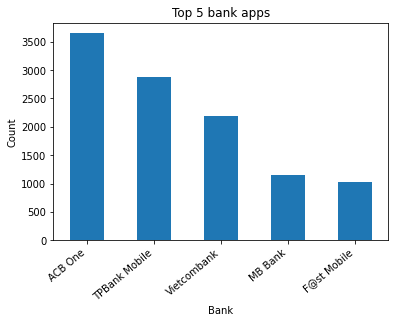

In [ ]:
# top 5 bank apps có nhiều reviews nhất
bank_app_[0:5].plot(kind = 'bar')
plt.ylabel('Count')
plt.xticks(rotation=40,ha='right')
plt.title("Top 5 bank apps")
plt.show()

In [ ]:
data.groupby('review_score')['review_text'].count().sort_values(ascending = False)

review_score
1    7645
5    6524
3    1233
2    1214
4     917
Name: review_text, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

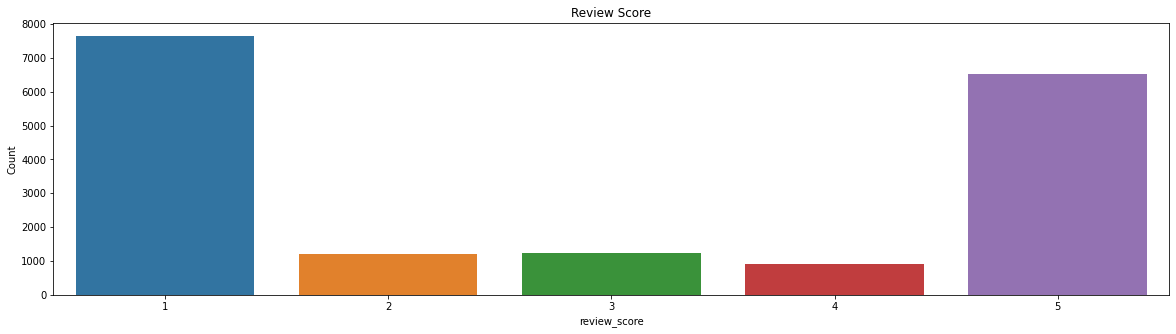

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data['review_score'])
plt.title("Review Score")
plt.xlabel('review_score')
plt.ylabel('Count')

Rating = 1 chiếm nhiều nhất với hơn 7645 reviews, số lượng lớn thứ 2 là rating = 5 với 6524 reviews, các điểm rating từ 2-4 chiếm số lượng xấp xỉ nhau khoảng 1000 reviews

In [ ]:
avg_score = data.groupby('Bank')['review_score'].mean().sort_values(ascending = False)
avg_score

Bank
VPBank NEOBiz                     5.000000
BIZ MBBANK                        4.618421
ACB One                           3.655626
Co-opBank Mobile Banking          3.444444
PV Mobile Banking                 3.425532
OCTO by CIMB                      3.360759
TPBank Mobile                     3.294770
HDBank                            3.288889
OCB OMNI - Digital Bank           3.179039
MyVIB                             3.005900
SHB Mobile Banking                2.980000
F@st Mobile                       2.837707
SCB Mobile Banking                2.778626
BIDV SmartBanking                 2.753731
VietinBank iPay                   2.678621
Vietbank Digital                  2.666667
Agribank E-Mobile Banking         2.614011
AB Ditizen                        2.563636
VPBank NEO                        2.532653
MB Bank                           2.454943
TNEX - Ngân hàng số thế hệ mới    2.409836
Sacombank mBanking                2.395760
MSB mBank                         2.393939
Sacomb

App có điểm trung bình cao nhất là 5.0 sao. Một số app có điểm trung bình thấp nhất là 1.44-1.94 sao.

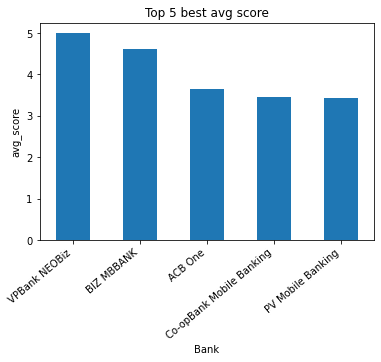

In [ ]:
# top 5 app có điểm trung bình cao nhất
avg_score[0:5].plot(kind = 'bar')
plt.ylabel('avg_score')
plt.xticks(rotation=40,ha='right')
plt.title("Top 5 best avg score")
plt.show()

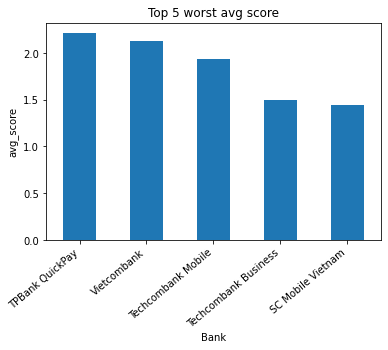

In [ ]:
# top 5 app có điểm trung bình thấp nhất
avg_score[-5:].plot(kind = 'bar')
plt.ylabel('avg_score')
plt.xticks(rotation=40,ha='right')
plt.title("Top 5 worst avg score")
plt.show()

In [36]:
data.to_csv('data.csv', index = False)